## Load necessary libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
train_data = pd.read_csv(r"C:\Users\HP\Liver train.csv")

In [3]:
train_data.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


## Check data types

In [4]:
train_data.dtypes

id                 int64
N_Days             int64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

## Check data shape

In [5]:
train_data.shape

(7905, 20)

In [6]:
duplicate_rows_df = train_data[train_data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 20)


## Check for null values

In [7]:
print(train_data.isnull().sum())

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64


## Exploratory Data Analysis

In [8]:
# converting the age (in days) into years
from datetime import date, timedelta

# Define the age in days
age_in_days = train_data['Age']
# Average number of days in a year (considering leap years)
average_days_in_year = 365.25

# Calculate age in years as a float
train_data['Age(inYears)'] = train_data['Age'] / average_days_in_year
train_data

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Age(inYears)
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,...,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D,58.951403
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,...,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C,52.668036
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,...,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D,37.582478
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,...,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C,50.540726
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,...,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C,45.607118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,...,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C,46.102669
7901,7901,1492,Placebo,17031,F,N,Y,N,N,0.9,...,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C,46.628337
7902,7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,...,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D,70.836413
7903,7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,...,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D,62.861054


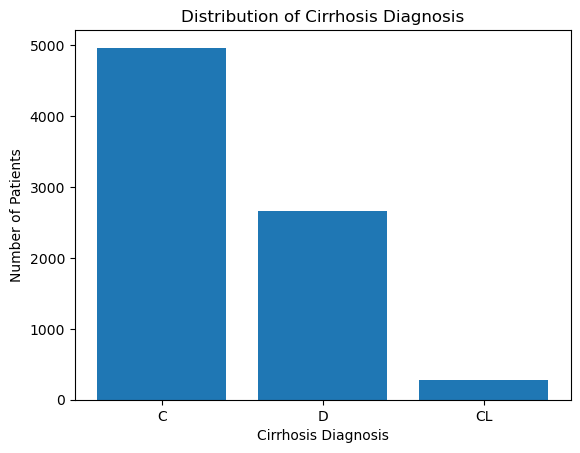

In [9]:
# Count patients with and without cirrhosis
cirrhosis_counts = train_data['Status'].value_counts()

plt.bar(cirrhosis_counts.index, cirrhosis_counts.values)
plt.xlabel('Cirrhosis Diagnosis')
plt.ylabel('Number of Patients')
plt.title('Distribution of Cirrhosis Diagnosis')
plt.show()

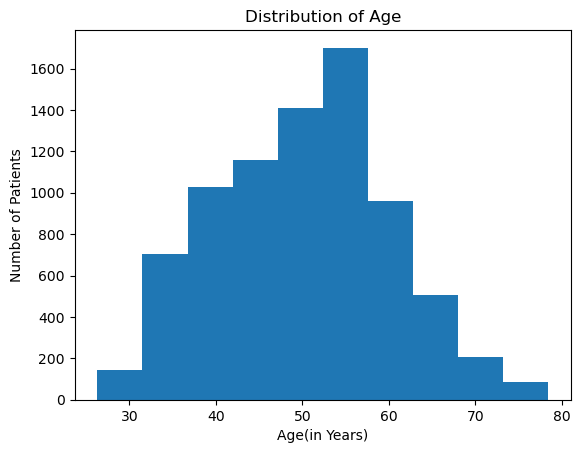

In [10]:
# Age distribution
plt.hist(train_data['Age(inYears)'])
plt.xlabel('Age(in Years)')
plt.ylabel('Number of Patients')
plt.title('Distribution of Age')
plt.show()

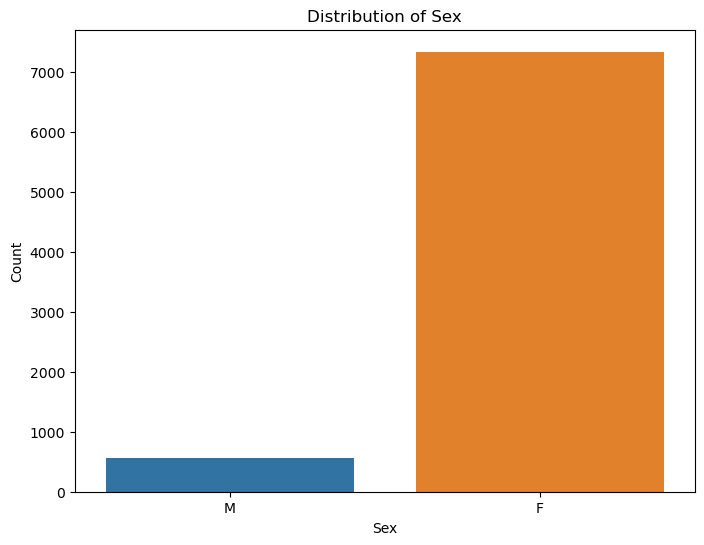

In [11]:
# Sex distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=train_data)
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

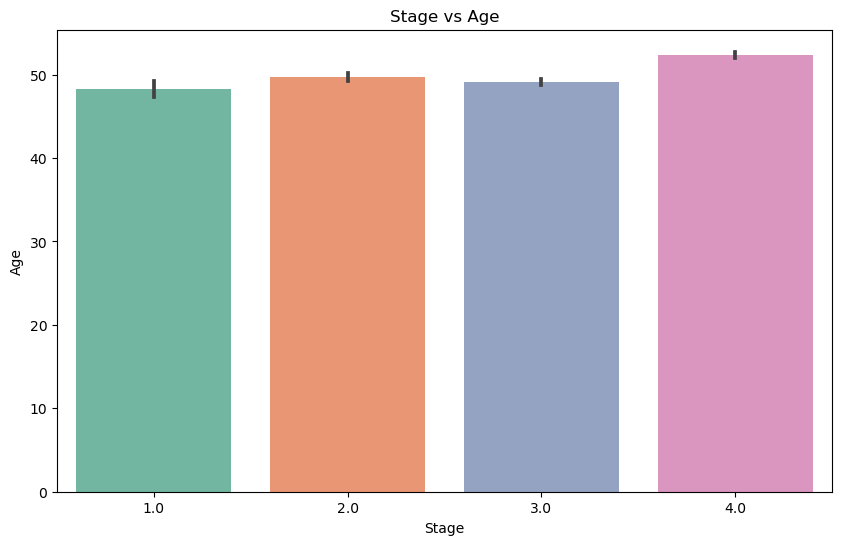

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Stage', y='Age(inYears)', data=train_data, palette='Set2')
plt.title('Stage vs Age')
plt.xlabel('Stage')
plt.ylabel('Age')
plt.show()

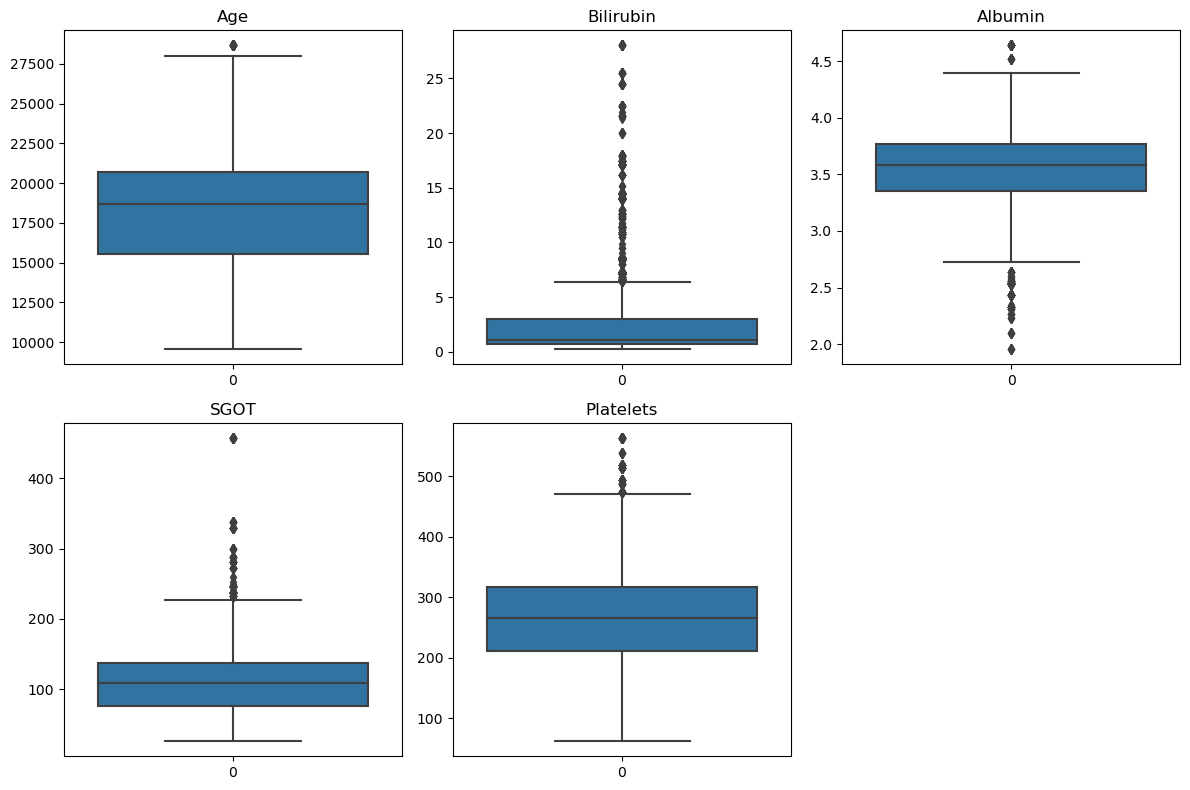

In [12]:
# Assuming your numerical columns are: 'Age', 'Bilirubin', 'Albumin', 'SGOT', 'Platelets'
numerical_columns = ['Age', 'Bilirubin', 'Albumin', 'SGOT', 'Platelets']

# Create boxplots for each numerical column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(train_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15720\2329718818.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_filtered.corr()


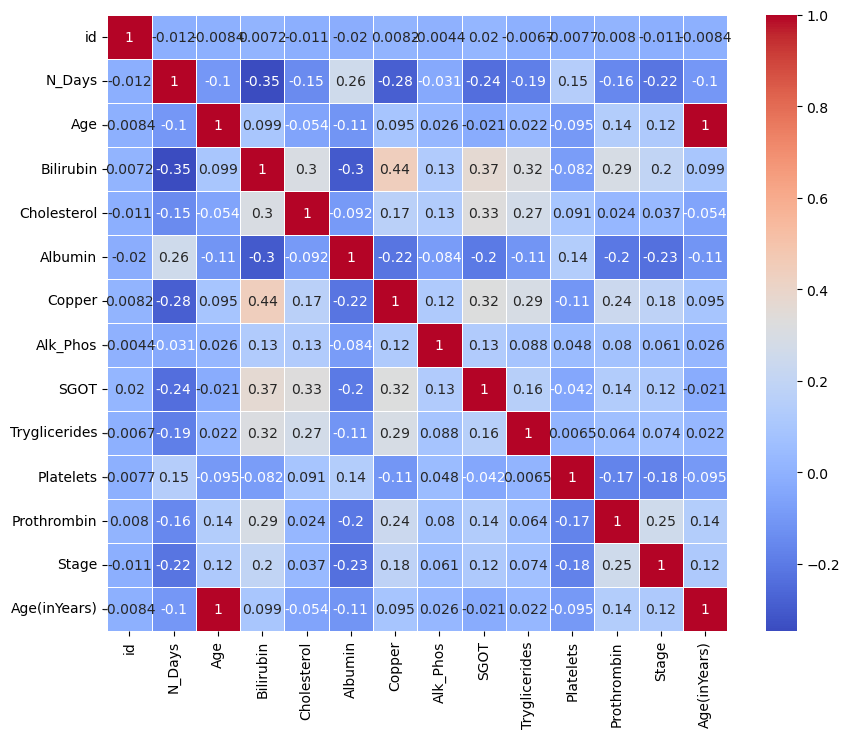

In [13]:
def plot_heatmap(train_data, exclude_columns=[]):    
    df_filtered = train_data.drop(columns=exclude_columns)   
    correlation_matrix = df_filtered.corr()   
    plt.figure(figsize=(10, 8))   
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)   
    plt.show()
plot_heatmap(train_data)
